In [2]:
import sys
sys.path.append('../_amigocloud')

In [3]:
import simplekml

In [5]:
from amigocloud import AmigoCloud
import pandas as pd
from shapely import wkb

import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, MultiPoint
#from shapely.geometry import Point, MultiPoint
import os
#from fastkml import kml

In [6]:
# ruta de carpera donde estan las llaves
ruta = open('../ruta.txt')
ruta = ruta.readlines()[0]

In [7]:
# leer token
acceso = open(ruta + '/_keys/api_amigocloud.key','r')
api_token = acceso.readlines()[0]
acceso.close()
amigocloud = AmigoCloud(token=api_token)
amigocloud

In [8]:
# leer los dos shps de siembra y puntos de planificacion
path_siembras = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\SIEMBRAS.shp'
path_cat = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\catastro140624.shp'
path_puntos = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\PUNTOS_PLAN.shp'

path_plan = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\PLANIFICACION.shp'

path_kml = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN'

path_xlsx_parte = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\PARTE DIARIO TRICHOGRAMMA 2024_RES.xlsx'

# ACTUALIZAR SHP PLANIFICACION

In [9]:
ors = 127

In [10]:
gdf_siembras = gpd.read_file(path_siembras)
gdf_puntos = gpd.read_file(path_puntos)
gdf_cat = gpd.read_file(path_cat)

In [11]:
# verifica si ambos shps tienen el mismo CRS
if gdf_siembras.crs == gdf_puntos.crs:
    print('Ambas capas tienen el mismo CRS')
else:
    print('No tienen el mismo CRS')

Ambas capas tienen el mismo CRS


In [12]:
# filtrar la semana de interes
gdf_puntos_select = gdf_puntos[gdf_puntos['os'] == ors]
gdf_puntos_sem = gdf_puntos_select.copy()
#quita caracteres especiales
gdf_puntos_sem['unidad_04'] = gdf_puntos_sem['unidad_04'].str.replace(r'[\r\n\t]', '', regex=True)
gdf_puntos_sem

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,"MULTIPOINT (501898.547 8094915.306, 502348.869..."


In [13]:
multipoint_gdf = gdf_puntos_sem

In [14]:
# Crear una lista para almacenar los nuevos registros de puntos individuales
point_records = []
# Iterar sobre cada registro en el GeoDataFrame original
for idx, row in multipoint_gdf.iterrows():
    multipoint_geom = row.geometry
    # Verificar si la geometría es de tipo multipunto
    if isinstance(multipoint_geom, MultiPoint):
        for point in multipoint_geom.geoms:
            # Crear un nuevo registro para cada punto individual
            new_record = row.copy()
            new_record.geometry = point
            point_records.append(new_record)
    else:
        # Si la geometría ya es un punto, simplemente añadir el registro original
        point_records.append(row)

# Crear un nuevo GeoDataFrame con los registros de puntos individuales
puntos_indi = gpd.GeoDataFrame(point_records, crs=multipoint_gdf.crs)

In [15]:
# puntos individuales
puntos_indi

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (501898.547 8094915.306)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (502348.869 8094905.252)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (502487.776 8095171.158)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (502737.807 8095437.065)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (502741.776 8094659.189)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (502844.964 8094234.532)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (503043.402 8094595.689)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (503249.777 8094325.813)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (503263.800 8095015.848)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (503424.403 8094742.533)


<Axes: >

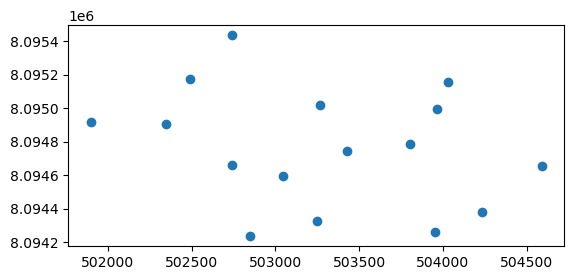

In [16]:
puntos_indi.plot()

In [17]:
# Asegurarse de que ambos GeoDataFrames tienen el mismo sistema de coordenadas (CRS)
if puntos_indi.crs != gdf_siembras.crs:
    print('Los CRS no son iguales')
    #gdf_siembras = gdf_siembras.to_crs(puntos_indi.crs)
else:
    print('Los CRS si son iguales')

Los CRS si son iguales


In [18]:
# Crear un GeoDataFrame vacío para almacenar los puntos que no intersectan con ningún polígono de siembras
puntos_indi_solicitado = puntos_indi[~puntos_indi.geometry.apply(lambda point: any(gdf_siembras.contains(point)))]

In [19]:
puntos_indi_solicitado

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (501898.547 8094915.306)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (502348.869 8094905.252)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (502487.776 8095171.158)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (502737.807 8095437.065)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (502741.776 8094659.189)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (502844.964 8094234.532)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (503043.402 8094595.689)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (503249.777 8094325.813)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (503263.800 8095015.848)
421,41594,AGROPECUARIA CAMPO DULCE S.R.L.,127,0,None,TEST,POINT (503424.403 8094742.533)


In [20]:
# identifoca los lotes que se intersectan
gdf_lotes_cat = gpd.sjoin(gdf_cat, puntos_indi_solicitado, how='inner', predicate='intersects')
# filtra los lotes intersectados en la capa original
poligonos_intersect_cat = gdf_cat.loc[gdf_cat.index.isin(gdf_lotes_cat.index)]
# copy
poligonos_intersect_cat = poligonos_intersect_cat.copy()
poligonos_intersect_cat = poligonos_intersect_cat[['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'area', 'soca', 'zona', 'geometry']]

In [21]:
# Cambiar el nombre de la columna 'old_name' a 'new_name'
poligonos_intersect_cat.rename(columns={'zona': 'inst'}, inplace=True)

In [22]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
2762,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L17,13.975706,3,50,"POLYGON ((501942.803 8095275.466, 502159.169 8..."
2765,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L8,27.445201,2,79,"POLYGON ((502662.752 8095215.781, 502656.293 8..."
2767,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L10,26.586339,1,79,"POLYGON ((502549.761 8095663.451, 503187.898 8..."
2769,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L33,4.243207,3,79,"POLYGON ((503740.137 8094257.659, 503785.465 8..."
2773,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L34,7.048921,4,79,"POLYGON ((504137.327 8094415.183, 504648.080 8..."
2774,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L5,10.318332,4,79,"POLYGON ((502800.712 8094558.618, 502817.481 8..."
2775,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L6,19.683505,4,79,"POLYGON ((503260.583 8094596.306, 503714.735 8..."
2812,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L35,7.795719,3,79,"POLYGON ((504693.348 8094607.629, 504673.327 8..."
4090,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L1,28.416571,1,79,"POLYGON ((503029.463 8093985.567, 502640.042 8..."
4091,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L31,30.260942,1,79,"POLYGON ((504085.659 8094406.031, 503737.808 8..."


In [23]:
# CAMBIAR NOMBRE DATOS DE UNIDAD_03 Y UNDIAD_04 DE LOTES SOLICITADOS A LO INDICADO EN LOS PUNTOS
# Iterar sobre cada punto y encontrar el polígono que intersecta
for idx, point in puntos_indi_solicitado.iterrows():
    point_geom = point.geometry
    matching_polygons = poligonos_intersect_cat[poligonos_intersect_cat.intersects(point_geom)]
    
    # Actualizar los campos de los polígonos que intersectan con los valores del punto
    for poly_idx in matching_polygons.index:
        poligonos_intersect_cat.at[poly_idx, 'unidad_03'] = point['unidad_03']
        poligonos_intersect_cat.at[poly_idx, 'unidad_04'] = point['unidad_04']

In [24]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
2762,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L17,13.975706,3,50,"POLYGON ((501942.803 8095275.466, 502159.169 8..."
2765,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L8,27.445201,2,79,"POLYGON ((502662.752 8095215.781, 502656.293 8..."
2767,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L10,26.586339,1,79,"POLYGON ((502549.761 8095663.451, 503187.898 8..."
2769,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L33,4.243207,3,79,"POLYGON ((503740.137 8094257.659, 503785.465 8..."
2773,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L34,7.048921,4,79,"POLYGON ((504137.327 8094415.183, 504648.080 8..."
2774,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L5,10.318332,4,79,"POLYGON ((502800.712 8094558.618, 502817.481 8..."
2775,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L6,19.683505,4,79,"POLYGON ((503260.583 8094596.306, 503714.735 8..."
2812,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L35,7.795719,3,79,"POLYGON ((504693.348 8094607.629, 504673.327 8..."
4090,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L1,28.416571,1,79,"POLYGON ((503029.463 8093985.567, 502640.042 8..."
4091,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L31,30.260942,1,79,"POLYGON ((504085.659 8094406.031, 503737.808 8..."


In [25]:
# agrega los campos faltantes
poligonos_intersect_cat['fecha_ini'] = ''
poligonos_intersect_cat['origen'] = 'SOLICITUD'
poligonos_intersect_cat['dias'] = 0
poligonos_intersect_cat['fecha'] = ''
poligonos_intersect_cat['os'] = ors

In [26]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os
2762,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L17,13.975706,3,50,"POLYGON ((501942.803 8095275.466, 502159.169 8...",,SOLICITUD,0,,127
2765,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L8,27.445201,2,79,"POLYGON ((502662.752 8095215.781, 502656.293 8...",,SOLICITUD,0,,127
2767,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L10,26.586339,1,79,"POLYGON ((502549.761 8095663.451, 503187.898 8...",,SOLICITUD,0,,127
2769,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L33,4.243207,3,79,"POLYGON ((503740.137 8094257.659, 503785.465 8...",,SOLICITUD,0,,127
2773,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L34,7.048921,4,79,"POLYGON ((504137.327 8094415.183, 504648.080 8...",,SOLICITUD,0,,127
2774,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L5,10.318332,4,79,"POLYGON ((502800.712 8094558.618, 502817.481 8...",,SOLICITUD,0,,127
2775,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L6,19.683505,4,79,"POLYGON ((503260.583 8094596.306, 503714.735 8...",,SOLICITUD,0,,127
2812,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L35,7.795719,3,79,"POLYGON ((504693.348 8094607.629, 504673.327 8...",,SOLICITUD,0,,127
4090,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L1,28.416571,1,79,"POLYGON ((503029.463 8093985.567, 502640.042 8...",,SOLICITUD,0,,127
4091,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L31,30.260942,1,79,"POLYGON ((504085.659 8094406.031, 503737.808 8...",,SOLICITUD,0,,127


In [27]:
# SELECCIONAR LOS LOTES DE SIEMBRAS
# identifoca los lotes que se intersectan
gdf_lotes_siem = gpd.sjoin(gdf_siembras, multipoint_gdf, how='inner', predicate='intersects')
# filtra los lotes intersectados en la capa original
poligonos_intersect_siem = gdf_siembras.loc[gdf_siembras.index.isin(gdf_lotes_siem.index)]
# copy
poligonos_intersect_siem = poligonos_intersect_siem.copy()
# agregar campo de semana_planificacion
poligonos_intersect_siem['os'] = ors

In [28]:
# crea el campo soca, y coloca 0 o 1 dependiendo del origen
poligonos_intersect_siem['soca'] = poligonos_intersect_siem['origen'].apply(lambda x: 1 if 'SIEMBRA 2023' in x else 0)

In [29]:
poligonos_intersect_siem = poligonos_intersect_siem[['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'area',
       'fecha_ini', 'origen', 'dias', 'fecha', 'prioridad', 'inst', 'geometry', 'os', 'soca']]

In [30]:
poligonos_intersect_siem

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_ini,origen,dias,fecha,prioridad,inst,geometry,os,soca


In [31]:
# Concatenar los DataFrames a lo largo de las filas (axis=0)
plan = pd.concat([poligonos_intersect_cat, poligonos_intersect_siem], axis=0)
# Si deseas restablecer el índice después de concatenar
plan.reset_index(drop=True, inplace=True)

<Axes: >

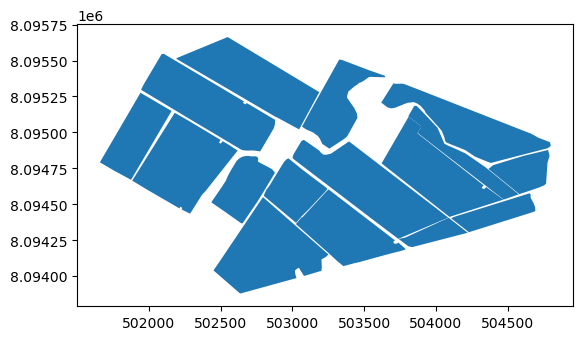

In [33]:
plan.plot()

In [35]:
plan['area'].sum()

284.08339123112

In [36]:
#RECALCULAR EL AREA
plan['area'] = plan.geometry.area / 10000

In [37]:
plan['area'].sum()

284.08339123124154

In [38]:
# carga el shp de planificacion
gdf_plan = gpd.read_file(path_plan)

In [39]:
# determina el ultimo id
last_id = 0
if gdf_plan['id'].max() > 0:
    last_id = gdf_plan['id'].max()
else:
    last_id = 0

In [40]:
last_id

4213

In [41]:
# Asignar valores incrementales a la columna 'id' empezando desde last_id + 1
plan['id'] = range(last_id + 1, last_id + 1 + len(plan))

In [42]:
plan

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os,prioridad,id
0,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L17,13.975706,3,50,"POLYGON ((501942.803 8095275.466, 502159.169 8...",,SOLICITUD,0.0,,127,NaN,4214
1,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L8,27.445201,2,79,"POLYGON ((502662.752 8095215.781, 502656.293 8...",,SOLICITUD,0.0,,127,NaN,4215
2,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L10,26.586339,1,79,"POLYGON ((502549.761 8095663.451, 503187.898 8...",,SOLICITUD,0.0,,127,NaN,4216
3,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L33,4.243207,3,79,"POLYGON ((503740.137 8094257.659, 503785.465 8...",,SOLICITUD,0.0,,127,NaN,4217
4,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L34,7.048921,4,79,"POLYGON ((504137.327 8094415.183, 504648.080 8...",,SOLICITUD,0.0,,127,NaN,4218
5,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L5,10.318332,4,79,"POLYGON ((502800.712 8094558.618, 502817.481 8...",,SOLICITUD,0.0,,127,NaN,4219
6,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L6,19.683505,4,79,"POLYGON ((503260.583 8094596.306, 503714.735 8...",,SOLICITUD,0.0,,127,NaN,4220
7,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L35,7.795719,3,79,"POLYGON ((504693.348 8094607.629, 504673.327 8...",,SOLICITUD,0.0,,127,NaN,4221
8,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L1,28.416571,1,79,"POLYGON ((503029.463 8093985.567, 502640.042 8...",,SOLICITUD,0.0,,127,NaN,4222
9,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L31,30.260942,1,79,"POLYGON ((504085.659 8094406.031, 503737.808 8...",,SOLICITUD,0.0,,127,NaN,4223


In [43]:
len(plan)

16

In [44]:
# union de los dos gdf
gdf_pla_gral = pd.concat([gdf_plan, plan], ignore_index=True)

In [46]:
gdf_pla_gral['area'].sum()

30505.309997410033

In [47]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['dias'] = gdf_pla_gral['dias'].astype(int)
#gdf_pla_gral['prioridad'] = gdf_pla_gral['prioridad'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [48]:
# exportar los datos en nuevo shp
gdf_pla_gral.to_file(path_plan)

In [49]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_ini,origen,dias,fecha,...,os,soca,id,inst,telefono_1,telefono_2,telefono_3,idd,asignado,geometry
0,47,SANTA MARTHA,40149,PAZ REA JOSE ERNESTO,A7,10.696703,21/5/2024,SIEMBRA 2023,37,2024-05-21,...,26,1,1,69,0.0,0.0,0.0,35.0,None,"POLYGON ((488616.298 8103763.516, 488519.488 8..."
1,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L7.2,1.835936,2024-04-15,SIEMBRA 2024,73,2024-04-15,...,26,0,2,62,0.0,0.0,0.0,54.0,None,"POLYGON ((473330.370 8101634.734, 473440.011 8..."
2,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L6,1.960231,2024-04-15,SIEMBRA 2024,73,2024-04-15,...,26,0,3,62,0.0,0.0,0.0,54.0,None,"POLYGON ((473242.172 8101427.289, 473148.580 8..."
3,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L9.1,3.607907,2024-04-16,SIEMBRA 2024,72,2024-04-16,...,26,0,4,62,0.0,0.0,0.0,54.0,None,"POLYGON ((473286.579 8101086.503, 473265.875 8..."
4,2123,LAS CHACRAS PORTACHUELO,13132,ZUMARAN MENACHO JORGE,L1.6,0.386826,2024-04-22,SIEMBRA 2024,66,2024-04-22,...,26,0,5,50,0.0,0.0,0.0,63.0,None,"POLYGON ((455236.898 8084312.120, 455248.807 8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L9,26.783587,,SOLICITUD,0,,...,127,2,4225,79,NaN,NaN,NaN,NaN,NaN,"POLYGON ((502151.946 8095089.317, 502180.927 8..."
3934,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L16,23.216246,,SOLICITUD,0,,...,127,3,4226,79,NaN,NaN,NaN,NaN,NaN,"POLYGON ((504352.053 8094797.970, 504272.088 8..."
3935,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L17 B,24.012333,,SOLICITUD,0,,...,127,4,4227,79,NaN,NaN,NaN,NaN,NaN,"POLYGON ((503810.600 8095108.958, 503811.063 8..."
3936,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L17 A,8.432906,,SOLICITUD,0,,...,127,3,4228,79,NaN,NaN,NaN,NaN,NaN,"POLYGON ((503873.849 8095001.890, 503896.221 8..."


# CARGAR PLANIFICACION A AMIGOCLOUD

In [50]:
def convertir_a_multipolygon(geometry):
    if isinstance(geometry, Polygon):
        return MultiPolygon([geometry])
    return geometry

def convertir_a_wkb(polygon):
    wkb_data = wkb.dumps(polygon, hex=True)
    return wkb_data

In [51]:
# repreyectar a WGS84
gdf_pla_gral = plan.to_crs(epsg=4326)
# convertir poligonos a multipoligonos
gdf_pla_gral['geometry'] = gdf_pla_gral['geometry'].apply(convertir_a_multipolygon)

In [52]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['dias'] = gdf_pla_gral['dias'].astype(int)
#gdf_pla_gral['prioridad'] = gdf_pla_gral['prioridad'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [53]:
len(gdf_pla_gral)

16

In [54]:
# recorrer el gdf de lotes y cargarlo a amigocloud
id_proyecto = f'https://app.amigocloud.com/api/v1/projects/33457/sql'
for index, row in gdf_pla_gral.iterrows():
    wkb_hex = convertir_a_wkb(row['geometry'])
    insert_sql = f"""
    INSERT INTO dataset_345601 (id, unidad_01, unidad_02, unidad_03, unidad_04, unidad_05, area, origen, dias, os, geometry)
    VALUES ({row['id']}, {row['unidad_01']}, '{row['unidad_02']}', {row['unidad_03']}, '{row['unidad_04']}', '{row['unidad_05']}', {row['area']}, '{row['origen']}', '{row['dias']}', '{row['os']}', ST_SetSRID(ST_GeomFromWKB('\\x{wkb_hex}'), 4326));
    """
    query_sql = {'query': insert_sql}
    resultado_post = amigocloud.post(id_proyecto, query_sql)

# CREAR KMLS DE PLANIFICACION

In [55]:
gdf_plan = gpd.read_file(path_plan)
gdf_plan_sem = gdf_plan[gdf_plan['os'] == ors]
gdf_plan_sem['area'].sum()
lista_cods = list(set(gdf_plan_sem['unidad_01']))
lista_cods

284.08339123124154

[30]

In [59]:
for i in lista_cods:
    prop = gdf_plan_sem[gdf_plan_sem['unidad_01'] == i]
    prop_wgs = prop.to_crs(epsg=4326)
    output_folder = path_kml + '\\' + str(i)
    print(output_folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # Recorrer el GeoDataFrame
    for idx, row in prop_wgs.iterrows():
        # Crear un nuevo documento KML
        kml_doc = simplekml.Kml()
        # Obtener el polígono y el nombre
        polygon = row['geometry']
        name = row['unidad_05']
        # Convertir el polígono en una lista de coordenadas
        coords = [(x, y) for x, y in zip(*polygon.exterior.xy)]    
        # Añadir el polígono al documento KML
        pol = kml_doc.newpolygon(name=name, outerboundaryis=coords)
        # Guardar el archivo KML
        file_name = f"{name}.kml"
        output_path = os.path.join(output_folder, file_name)
        kml_doc.save(output_path)

G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\30


# CARGAR XLSX

In [60]:
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from datetime import datetime

In [61]:
# Cargar el archivo Excel
sheet_name = 'DATA'
table_name = 'tbl_data'

In [62]:
excel_data = pd.read_excel(path_xlsx_parte)

In [63]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os,prioridad,id
0,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L17,13.975706,3,50,"MULTIPOLYGON (((-62.98173 -17.22752, -62.97969...",,SOLICITUD,0,,127,NaN,4214
1,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L8,27.445201,2,79,"MULTIPOLYGON (((-62.97495 -17.22806, -62.97501...",,SOLICITUD,0,,127,NaN,4215
2,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L10,26.586339,1,79,"MULTIPOLYGON (((-62.97602 -17.22401, -62.97001...",,SOLICITUD,0,,127,NaN,4216
3,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L33,4.243207,3,79,"MULTIPOLYGON (((-62.96482 -17.23672, -62.96439...",,SOLICITUD,0,,127,NaN,4217
4,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L34,7.048921,4,79,"MULTIPOLYGON (((-62.96108 -17.23529, -62.95628...",,SOLICITUD,0,,127,NaN,4218
5,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L5,10.318332,4,79,"MULTIPOLYGON (((-62.97366 -17.23400, -62.97350...",,SOLICITUD,0,,127,NaN,4219
6,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L6,19.683505,4,79,"MULTIPOLYGON (((-62.96933 -17.23366, -62.96506...",,SOLICITUD,0,,127,NaN,4220
7,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L35,7.795719,3,79,"MULTIPOLYGON (((-62.95585 -17.23355, -62.95604...",,SOLICITUD,0,,127,NaN,4221
8,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L1,28.416571,1,79,"MULTIPOLYGON (((-62.97150 -17.23918, -62.97517...",,SOLICITUD,0,,127,NaN,4222
9,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L31,30.260942,1,79,"MULTIPOLYGON (((-62.96157 -17.23537, -62.96484...",,SOLICITUD,0,,127,NaN,4223


In [64]:
list(gdf_pla_gral['unidad_01'])

[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]

In [65]:
new_data = {
    'INSTITUCION':list(gdf_pla_gral['inst']), 
    'COD CANERO': list(gdf_pla_gral['unidad_03']),
    'NOMBRE CANERO': list(gdf_pla_gral['unidad_04']),
    'COD PROPIEDAD': list(gdf_pla_gral['unidad_01']),
    'NOMBRE PROPIEDAD': list(gdf_pla_gral['unidad_02']),
    'LOTE': list(gdf_pla_gral['unidad_05']),
    'HECTAREA': list(gdf_pla_gral['area']),
    'CICLO': list(gdf_pla_gral['soca']),
    'FINANCIADO': list(gdf_pla_gral['origen']),
    'ID': list(gdf_pla_gral['id']),
    'OS': list(gdf_pla_gral['os'])
}

new_df = pd.DataFrame(new_data)

In [66]:
new_df['PRODUCTO'] = 'TRICHOGRAMMA'
new_df['DOSIS'] = '6ml'

In [67]:
new_df

,INSTITUCION,COD CANERO,NOMBRE CANERO,COD PROPIEDAD,NOMBRE PROPIEDAD,LOTE,HECTAREA,CICLO,FINANCIADO,ID,OS,PRODUCTO,DOSIS
0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,ER-L17,13.975706,3,SOLICITUD,4214,127,TRICHOGRAMMA,6ml
1,79,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L8,27.445201,2,SOLICITUD,4215,127,TRICHOGRAMMA,6ml
2,79,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L10,26.586339,1,SOLICITUD,4216,127,TRICHOGRAMMA,6ml
3,79,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L33,4.243207,3,SOLICITUD,4217,127,TRICHOGRAMMA,6ml
4,79,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L34,7.048921,4,SOLICITUD,4218,127,TRICHOGRAMMA,6ml
5,79,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,ER-L5,10.318332,4,SOLICITUD,4219,127,TRICHOGRAMMA,6ml
6,79,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,ER-L6,19.683505,4,SOLICITUD,4220,127,TRICHOGRAMMA,6ml
7,79,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L35,7.795719,3,SOLICITUD,4221,127,TRICHOGRAMMA,6ml
8,79,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,ER-L1,28.416571,1,SOLICITUD,4222,127,TRICHOGRAMMA,6ml
9,79,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L31,30.260942,1,SOLICITUD,4223,127,TRICHOGRAMMA,6ml


In [68]:
final_data = pd.concat([excel_data, new_df], ignore_index=True)

In [69]:
final_data.to_excel(path_xlsx_parte, index=False)

In [9]:
path_plan = r'G:\BISMARK\_TEMP\CITTCA.shp'

In [10]:
gdf_plan_sem = gpd.read_file(path_plan)
lista_cods = list(set(gdf_plan_sem['unidad_01']))
lista_cods

[299.0]

In [11]:
for i in lista_cods:
    prop = gdf_plan_sem[gdf_plan_sem['unidad_01'] == i]
    prop_wgs = prop.to_crs(epsg=4326)
    output_folder = path_kml + '\\' + str(i)
    print(output_folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # Recorrer el GeoDataFrame
    for idx, row in prop_wgs.iterrows():
        # Crear un nuevo documento KML
        kml_doc = simplekml.Kml()
        # Obtener el polígono y el nombre
        polygon = row['geometry']
        name = row['unidad_05']
        # Convertir el polígono en una lista de coordenadas
        coords = [(x, y) for x, y in zip(*polygon.exterior.xy)]    
        # Añadir el polígono al documento KML
        pol = kml_doc.newpolygon(name=name, outerboundaryis=coords)
        # Guardar el archivo KML
        file_name = f"{name}.kml"
        output_path = os.path.join(output_folder, file_name)
        kml_doc.save(output_path)

G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\299.0
